In [2]:
import cv2
from PIL import Image
import numpy as np

In [3]:
def imshow(a):
    a = a.clip(0, 255).astype("uint8")
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(a))

In [11]:
def mask_image(img):
    width, height = img.shape[1], img.shape[0]
    padding = 30
    min_size = 30
    max_size = 80

    box_width = np.random.randint(min_size, max_size)
    box_height = np.random.randint(min_size, max_size)

    anchor = np.random.randint(0+padding, width - padding - box_width), np.random.randint(0+padding, height - padding - box_height)


    img[anchor[1]:anchor[1]+box_height, anchor[0]:anchor[0]+box_width, :] = 0

    return img

In [10]:
img = cv2.imread('../.images/test_256/Places365_test_00003209.jpg')

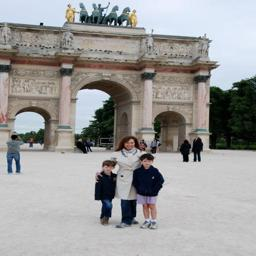

In [11]:
imshow(img)

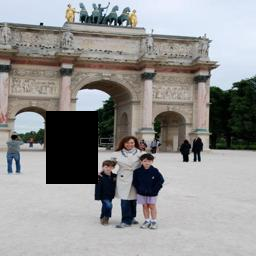

In [15]:
imshow(mask_image(img.copy()))

In [9]:
from pathlib import Path

files = np.array(list((Path("../.images/test_256").glob("*.jpg"))))

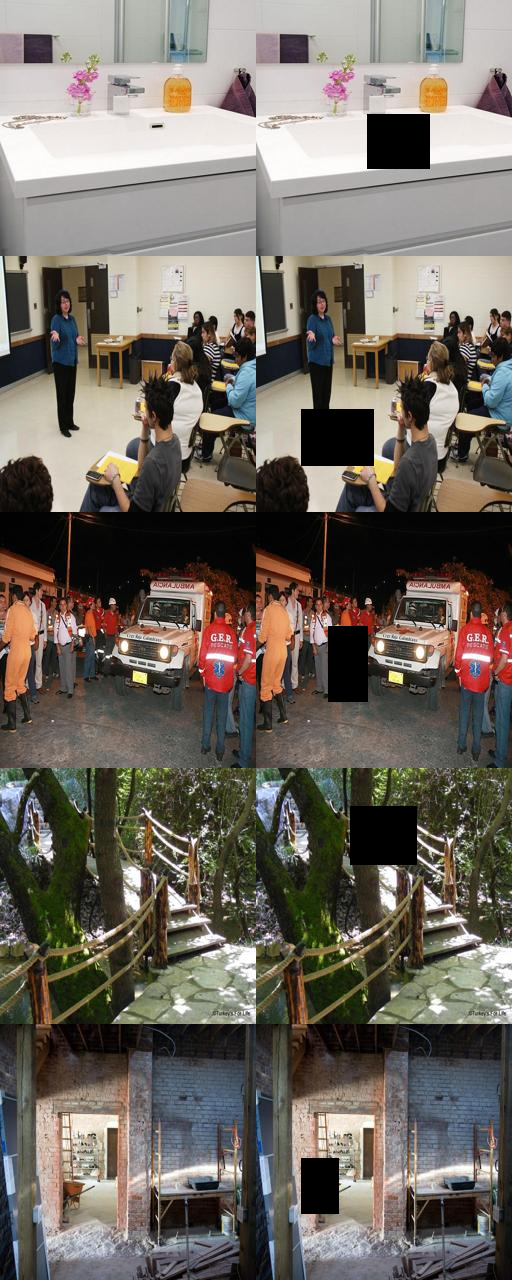

In [22]:
imgs = None
masks = None
for file in np.random.choice(files, size=5, replace=False):
    img = cv2.imread(file)
    assert img is not None, "Image not found"

    masked = mask_image(img.copy())
    imgs = np.concatenate([imgs, img], axis=0) if imgs is not None else img
    masks = np.concatenate([masks, masked], axis=0) if masks is not None else masked

imshow(np.concatenate([imgs, masks], axis=1))
